# WeatherPy

---

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import stats

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | tadine
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | oroqen zizhiqi
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | sola
Processing Record 10 of Set 1 | qaqortoq
Processing Record 11 of Set 1 | queenstown
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | hamilton
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | chaplygin
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | pamandzi
Processing Record 19 of Set 1 | egilsstadir
Processing Record 20 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 21 of Set 1 | touros
Processing Record 22 of Se

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,280.21,65,0,4.12,CL,1682295108
1,port elizabeth,-33.9180,25.5701,292.09,92,100,0.89,ZA,1682294900
2,bilibino,68.0546,166.4372,273.93,64,26,2.35,RU,1682295110
3,tadine,-21.5500,167.8833,299.42,75,81,2.35,NC,1682295110
4,albany,42.6001,-73.9662,282.72,86,93,1.61,US,1682294823


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("weather_output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("weather_output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,280.21,65,0,4.12,CL,1682295108
1,port elizabeth,-33.9180,25.5701,292.09,92,100,0.89,ZA,1682294900
2,bilibino,68.0546,166.4372,273.93,64,26,2.35,RU,1682295110
3,tadine,-21.5500,167.8833,299.42,75,81,2.35,NC,1682295110
4,albany,42.6001,-73.9662,282.72,86,93,1.61,US,1682294823


#### Latitude Vs. Temperature

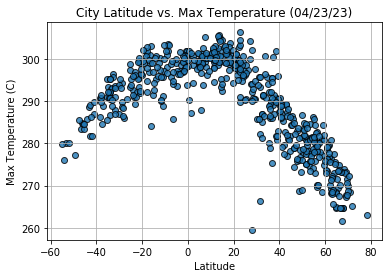

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True) 

# Save the figure
plt.savefig("weather_output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

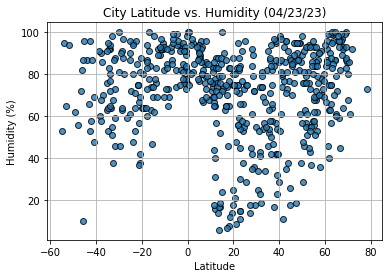

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

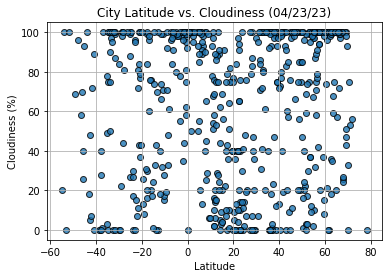

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

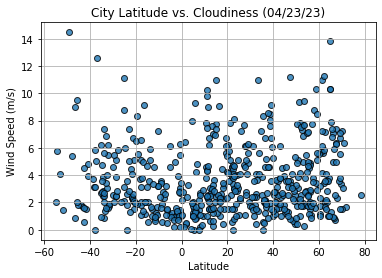

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [35]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    # Label plot and annotate the line equation
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bilibino,68.0546,166.4372,273.93,64,26,2.35,RU,1682295110
4,albany,42.6001,-73.9662,282.72,86,93,1.61,US,1682294823
6,oroqen zizhiqi,50.5667,123.7167,277.80,29,1,1.72,CN,1682295111
9,qaqortoq,60.7167,-46.0333,273.47,87,96,1.18,GL,1682295111
12,hamilton,39.1834,-84.5333,280.84,54,100,3.60,US,1682294840


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,280.21,65,0,4.12,CL,1682295108
1,port elizabeth,-33.9180,25.5701,292.09,92,100,0.89,ZA,1682294900
3,tadine,-21.5500,167.8833,299.42,75,81,2.35,NC,1682295110
5,hithadhoo,-0.6000,73.0833,301.95,73,97,2.84,MV,1682295110
7,west island,-12.1568,96.8225,300.14,89,40,4.63,CC,1682295111


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8003192004864624


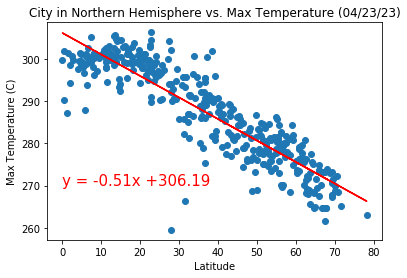

In [37]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "City in Northern Hemisphere vs. Max Temperature (%s)" % time.strftime("%x"), "Max Temperature (C)", (0,270,))

The r-value is: 0.5876234895125726


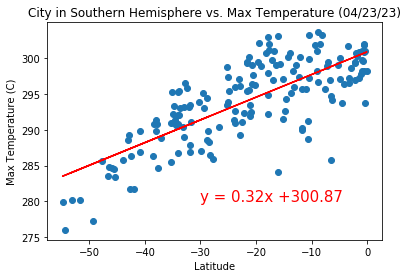

In [43]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "City in Southern Hemisphere vs. Max Temperature (%s)" % time.strftime("%x"), "Max Temperature (C)", (-30,280))

**Discussion about the linear relationship:** The coorelation between Latitude and Max Temperature of cities in the Northern Hemisphere is stronger than that of cities in the Southern Hemisphere. Both scatterplots reflect temperatures decreasing as the latitude gets further from the equator (0 degrees C). 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.02611140155199409


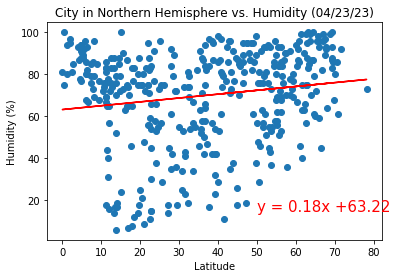

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "City in Northern Hemisphere vs. Humidity (%s)" % time.strftime("%x"), "Humidity (%)", (50,15))

The r-value is: 0.10108085273005353


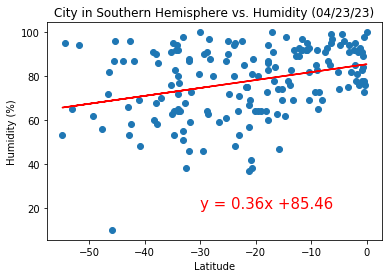

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "City in Southern Hemisphere vs. Humidity (%s)" % time.strftime("%x"), "Humidity (%)", (-30,20))

**Discussion about the linear relationship:** Neither hemisphere has a strong correlation between latitude and humidity, meaning the latitude doesn't necessarily have an effect on humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.030291892301721222


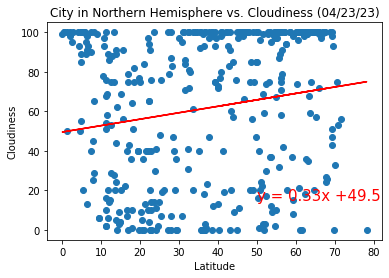

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "City in Northern Hemisphere vs. Cloudiness (%s)" % time.strftime("%x"), "Cloudiness", (50,15))

The r-value is: 0.030178964699831456


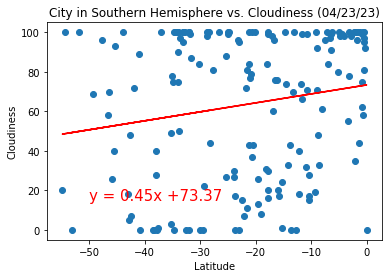

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "City in Southern Hemisphere vs. Cloudiness (%s)" % time.strftime("%x"), "Cloudiness", (-50,15))

**Discussion about the linear relationship:** The correlation between Latitude and Cloudiness is really comparable bewteen the northern and southern hemispheres. No matter where you are on the globe, the cloudiness will be an effect of other factors, not latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02934373872729478


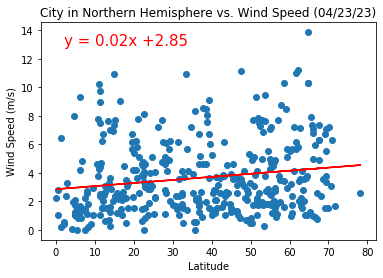

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "City in Northern Hemisphere vs. Wind Speed (%s)" % time.strftime("%x"), "Wind Speed (m/s)", (2,13))

The r-value is: 0.0762353161429111


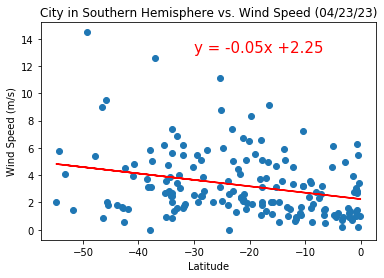

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "City in Southern Hemisphere vs. Wind Speed (%s)" % time.strftime("%x"), "Wind Speed (m/s)", (-30,13))

**Discussion about the linear relationship:** Both linear regression equations for latitude vs. wind speed indicate slightly higher wind speed as the latitude gets further from the equator (0). 